In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# Setting up visualization style
plt.style.use('seaborn-darkgrid')
sns.set_theme()

C:\Users\xmrmo\AppData\Local\Temp\ipykernel_21144\1591061093.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [28]:
# Fetch stock data using yfinance
stock_symbol = "RPOWER.NS"  # Replace with any stock symbol of your choice
start_date = "2020-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows
print(data.head())


[*********************100%%**********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2020-01-01  3.55  3.65  3.50   3.65       3.65  18323699
2020-01-02  3.65  3.70  3.50   3.55       3.55  14739717
2020-01-03  3.55  3.55  3.40   3.45       3.45   9106074
2020-01-06  3.40  3.55  3.30   3.30       3.30  15665622
2020-01-07  3.15  3.25  3.15   3.15       3.15  13551600


In [29]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (forward fill)
data.fillna(method='ffill', inplace=True)

# Verify missing values are handled
print(data.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\xmrmo\AppData\Local\Temp\ipykernel_21144\177758080.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [30]:
# Adding Simple Moving Averages (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

In [31]:
# Calculate RSI(Relative Strength Index)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0))
loss = (-delta.where(delta < 0, 0))

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [32]:
# Bollinger Bands
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_Upper'] = data['BB_Middle'] + 2 * data['Close'].rolling(window=20).std()
data['BB_Lower'] = data['BB_Middle'] - 2 * data['Close'].rolling(window=20).std()

In [33]:
# Log Returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

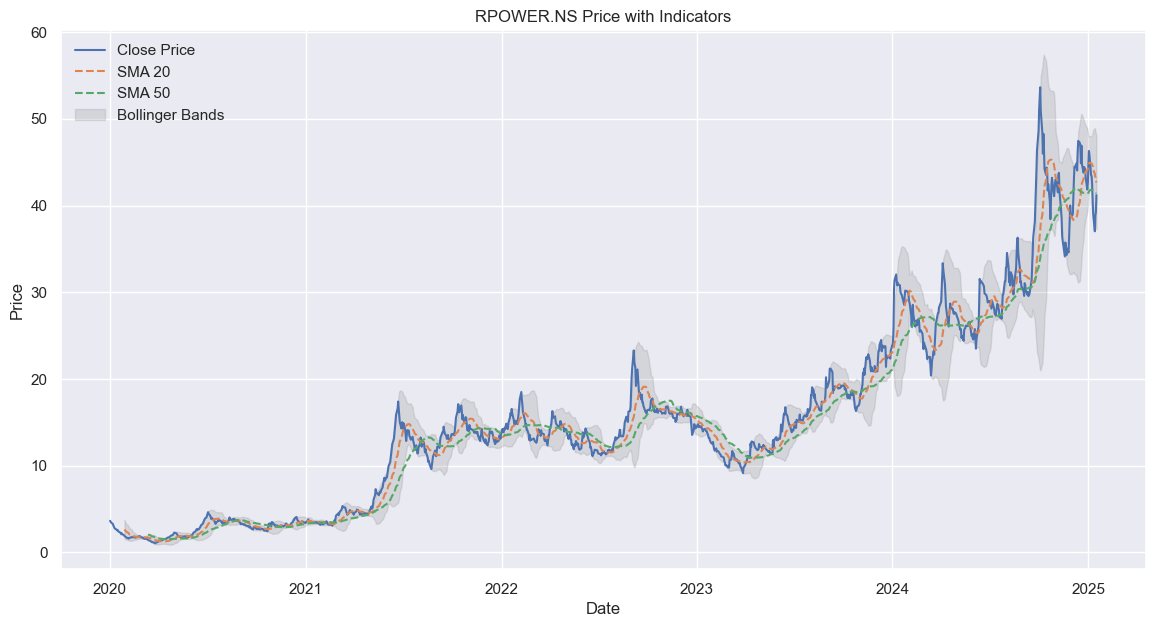

In [34]:
# Plot closing prices with indicators
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--')
plt.fill_between(data.index, data['BB_Upper'], data['BB_Lower'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.title(f"{stock_symbol} Price with Indicators")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

C:\Users\xmrmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


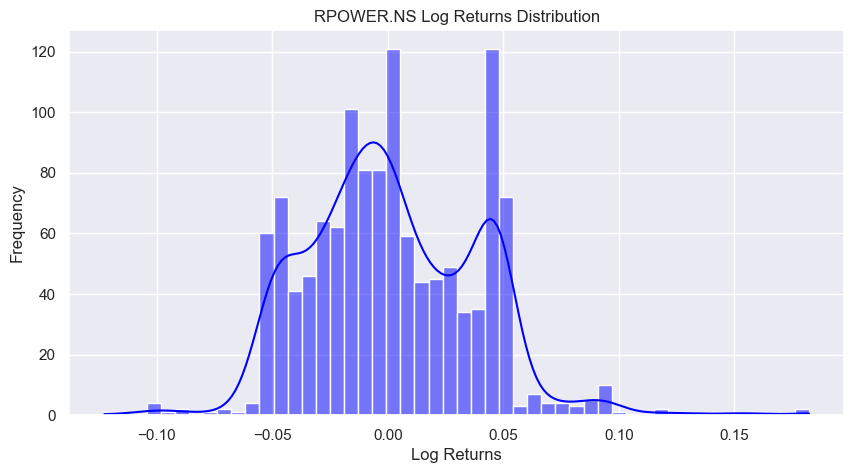

In [35]:
# Plot returns distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Log_Returns'].dropna(), kde=True, bins=50, color='blue')
plt.title(f"{stock_symbol} Log Returns Distribution")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.show()


In [36]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_20',
       'SMA_50', 'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'Log_Returns'],
      dtype='object')


In [38]:
# Buy signal: SMA 20 crosses above SMA 50
data['Buy_Signal'] = (data['SMA_20'] > data['SMA_50']) & (data['SMA_20'].shift(1) <= data['SMA_50'].shift(1))

# Sell signal: SMA 20 crosses below SMA 50
data['Sell_Signal'] = (data['SMA_20'] < data['SMA_50']) & (data['SMA_20'].shift(1) >= data['SMA_50'].shift(1))


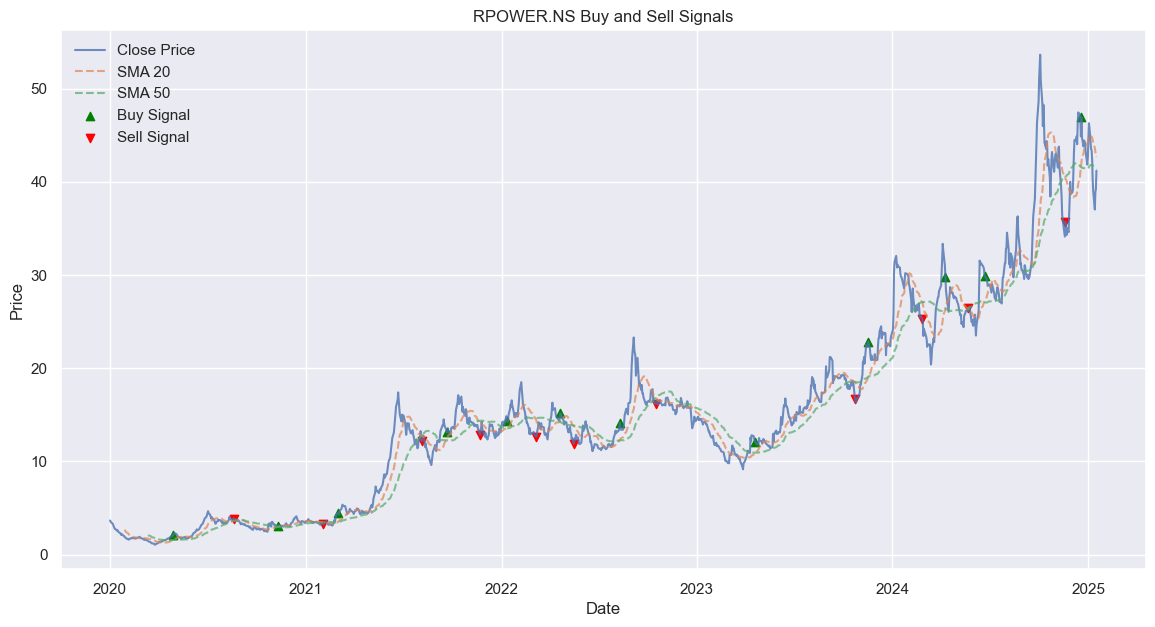

In [39]:
# Ensure columns exist
if 'Buy_Signal' not in data.columns or 'Sell_Signal' not in data.columns:
    print("Buy_Signal or Sell_Signal not found. Ensure the columns are created.")

# Plotting buy and sell signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.8)
plt.plot(data['SMA_20'], label='SMA 20', linestyle='--', alpha=0.7)
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--', alpha=0.7)

# Highlight buy and sell points
plt.scatter(data.index[data['Buy_Signal']], data['Close'][data['Buy_Signal']], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data.index[data['Sell_Signal']], data['Close'][data['Sell_Signal']], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title(f"{stock_symbol} Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [40]:
# Save the dataset
data.to_csv(f"{stock_symbol}_preprocessed.csv", index=True)
print(f"Preprocessed data saved to {stock_symbol}_preprocessed.csv")


Preprocessed data saved to RPOWER.NS_preprocessed.csv
